In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import joblib as jb


In [2]:
w_df = pd.read_csv("TARP.csv")
w_df.head()


,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [3]:
w_df.shape
w_df.info()
w_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
count,100000.000000,100000.000000,100000.000000,100000.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,45.484070,22.536100,45.016790,55.253650,24.263780,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
std,25.993998,13.251352,14.726676,32.093033,6.756751,4.325666,30.073448,24.168987,0.218448,0.773938,54.958389,36.917334,32.985883,50.647931
min,1.000000,0.000000,20.000000,0.000000,11.220000,0.000000,0.590000,0.000000,100.500000,3.504752,20.211267,0.000000,5.000000,5.000000
25%,23.000000,11.000000,32.000000,28.000000,18.580000,6.830000,33.980000,21.820000,100.980000,5.971693,64.551686,21.000000,28.000000,20.000000
50%,45.000000,23.000000,45.000000,55.000000,22.150000,9.530000,61.310000,37.240000,101.120000,6.425045,94.867624,37.000000,51.000000,32.000000
75%,68.000000,34.000000,58.000000,83.000000,29.590000,12.460000,86.360000,59.275000,101.260000,6.923643,124.267508,84.250000,68.000000,49.000000
max,90.000000,45.000000,70.000000,110.000000,45.560000,31.360000,96.000000,133.330000,101.860000,9.935091,298.560117,140.000000,145.000000,205.000000


In [4]:
columns = ["Air temperature (C)","Wind speed (Km/h)","Air humidity (%)","Wind gust (Km/h)","Pressure (KPa)","ph"]

w_df = w_df[columns]


In [5]:
w_df.isnull().sum()


Air temperature (C)    76005
Wind speed (Km/h)      76005
Air humidity (%)       76005
Wind gust (Km/h)       76005
Pressure (KPa)         76005
ph                     97800
dtype: int64

In [6]:
for col in w_df.columns:
    w_df[col] = w_df[col].fillna(w_df[col].mean())


In [7]:
w_df.isnull().sum()

Air temperature (C)    0
Wind speed (Km/h)      0
Air humidity (%)       0
Wind gust (Km/h)       0
Pressure (KPa)         0
ph                     0
dtype: int64

In [8]:
# Non-linear & interaction features
w_df["Temp_Squared"] = w_df["Air temperature (C)"] ** 2
w_df["Humidity_Deficit"] = 100 - w_df["Air humidity (%)"]
w_df["Wind_Impact"] = w_df["Wind speed (Km/h)"] * w_df["Humidity_Deficit"]
w_df["Pressure_Effect"] = (101.3 - w_df["Pressure (KPa)"]) ** 2
w_df["PH_Stress"] = abs(7 - w_df["ph"])


In [9]:
w_df["Water_Requirement"] = (
    0.04 * w_df["Air temperature (C)"] +
    0.03 * w_df["Wind speed (Km/h)"] +
    0.05 * w_df["Humidity_Deficit"] +
    0.02 * w_df["Wind gust (Km/h)"] +
    0.03 * w_df["Pressure_Effect"] +
    0.15 * w_df["PH_Stress"] +
    0.0005 * w_df["Temp_Squared"] +
    0.0003 * w_df["Wind_Impact"]
)


In [10]:
np.random.seed(42)
w_df["Water_Requirement"] += np.random.normal(0, 0.8, size=len(w_df))


In [11]:
X = w_df[
    [
        "Air temperature (C)",
        "Wind speed (Km/h)",
        "Air humidity (%)",
        "Wind gust (Km/h)",
        "Pressure (KPa)",
        "ph",
        "Temp_Squared",
        "Humidity_Deficit",
        "Wind_Impact",
        "Pressure_Effect",
        "PH_Stress"
    ]
]
y = w_df["Water_Requirement"]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Air temperature (C)  100000 non-null  float64
 1   Wind speed (Km/h)    100000 non-null  float64
 2   Air humidity (%)     100000 non-null  float64
 3   Wind gust (Km/h)     100000 non-null  float64
 4   Pressure (KPa)       100000 non-null  float64
 5   ph                   100000 non-null  float64
 6   Temp_Squared         100000 non-null  float64
 7   Humidity_Deficit     100000 non-null  float64
 8   Wind_Impact          100000 non-null  float64
 9   Pressure_Effect      100000 non-null  float64
 10  PH_Stress            100000 non-null  float64
dtypes: float64(11)
memory usage: 8.4 MB


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "Extra Trees": ExtraTreesRegressor(n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4
    ),
    "SVR": SVR()
}


In [15]:
results = []

for name, model in models.items():
    # Train on scaled data
    model.fit(X_train_scaled, y_train)

    # Predict on scaled data
    preds = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds))
    })

results_df = pd.DataFrame(results).sort_values(
    by="R2 Score", ascending=False
)

results_df


,Model,R2 Score,RMSE
0,Linear Regression,0.657408,0.804220
3,Gradient Boosting,0.655422,0.806548
4,SVR,0.653130,0.809226
1,Random Forest,0.646743,0.816643
2,Extra Trees,0.641471,0.822714


In [16]:
final_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

final_model.fit(X_train, y_train)

final_preds = final_model.predict(X_test)

print("Final R2:", r2_score(y_test, final_preds))
print("Final RMSE:", np.sqrt(mean_squared_error(y_test, final_preds)))


Final R2: 0.6553966283861723
Final RMSE: 0.8065782349747799


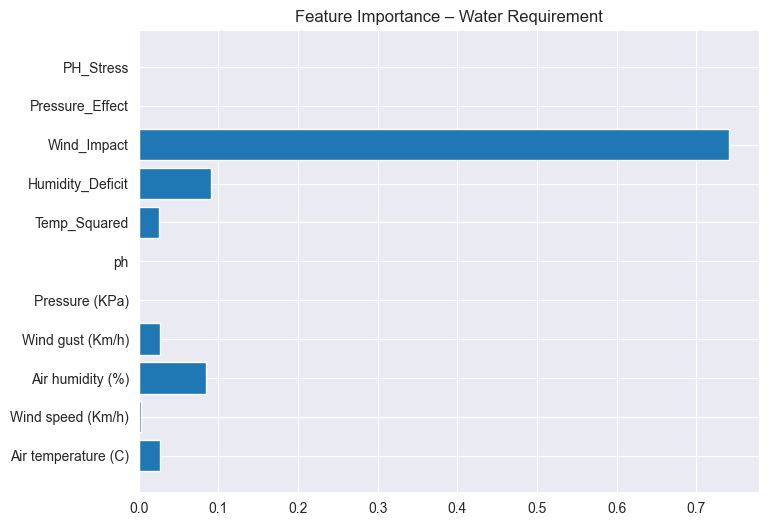

In [17]:
plt.figure(figsize=(8,6))
plt.barh(X.columns, final_model.feature_importances_)
plt.title("Feature Importance – Water Requirement")
plt.show()


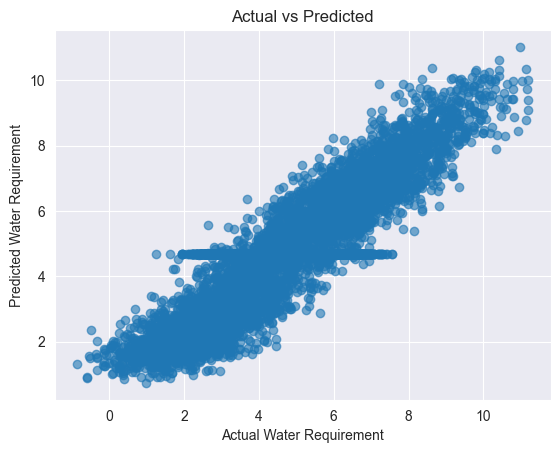

In [18]:
plt.scatter(y_test, final_preds, alpha=0.6)
plt.xlabel("Actual Water Requirement")
plt.ylabel("Predicted Water Requirement")
plt.title("Actual vs Predicted")
plt.show()


In [34]:
import joblib as jb
jb.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [20]:
jb.dump(final_model, "water_requirement_model.pkl")

['water_requirement_model.pkl']

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [23]:
df = pd.read_csv("TARP.csv")
columns = [
    "Air temperature (C)",
    "Wind speed (Km/h)",
    "Air humidity (%)",
    "Wind gust (Km/h)",
    "Pressure (KPa)",
    "ph"
]
df = df[columns]
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_2404\262950187.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [26]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

C:\Users\dell\PycharmProjects\Streamlit\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1509 - val_loss: 1.1109
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0066 - val_loss: 0.7842
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8871 - val_loss: 0.8544
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8242 - val_loss: 0.6836
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7922 - val_loss: 0.6641
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7850 - val_loss: 0.6817
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7773 - val_loss: 0.6965
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7638 - val_loss: 0.6579
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7477 - val_loss: 0.7045
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7437 - val_loss: 0.7236


In [29]:
preds = model.predict(X_test).flatten()
print("R2 Score:", r2_score(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step
R2 Score: 0.652265432839827
RMSE: 0.8102343847237281


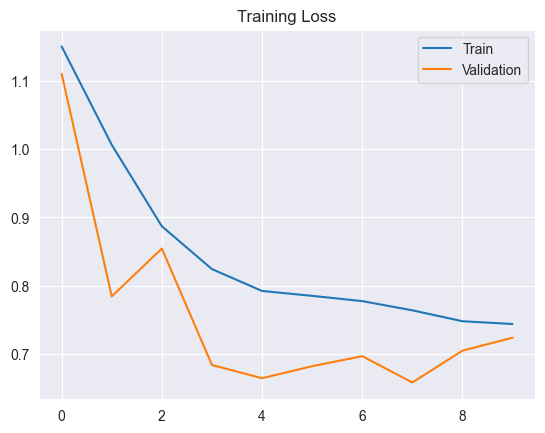

In [30]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title("Training Loss")
plt.show()

In [32]:
model.save("water_requirement_model.h5")
